In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [2]:
# Dataset Paths
dataset_dir = "D:/Deep learning/Holiday project/Data/UCI HAR Dataset"

In [3]:
class DataLoader:
    
    def __init__(self, dataset_dir):
        self.dataset_dir = dataset_dir
    
    def load_data(self):
        # Load feature names
        features = pd.read_csv(os.path.join(self.dataset_dir, 'features.txt'), delim_whitespace=True, header=None, names=['index', 'feature'])
        self.feature_names = features['feature'].values

        # Load activity labels
        activity_labels = pd.read_csv(os.path.join(self.dataset_dir, 'activity_labels.txt'), delim_whitespace=True, header=None, names=['index', 'activity'])
        
        # Load training and test datasets
        X_train = pd.read_csv(os.path.join(self.dataset_dir, 'train/X_train.txt'), delim_whitespace=True, header=None).values
        y_train = pd.read_csv(os.path.join(self.dataset_dir, 'train/y_train.txt'), delim_whitespace=True, header=None).values
        X_test = pd.read_csv(os.path.join(self.dataset_dir, 'test/X_test.txt'), delim_whitespace=True, header=None).values
        y_test = pd.read_csv(os.path.join(self.dataset_dir, 'test/y_test.txt'), delim_whitespace=True, header=None).values
        
        # One-hot encode labels
        y_train = to_categorical(y_train - 1)  # Subtract 1 to get labels from 0-5
        y_test = to_categorical(y_test - 1)
        
        # Normalize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Reshape data to 3D for RNN input (samples, timesteps, features)
        X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
        X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

        return X_train, y_train, X_test, y_test

In [4]:
# Instantiate DataLoader and load data
data_loader = DataLoader(dataset_dir)
X_train, y_train, X_test, y_test = data_loader.load_data()

In [5]:
class RNNModel:
    
    def __init__(self, input_shape, model_type='GRU'):
        self.model_type = model_type
        self.input_shape = input_shape
        self.model = self._build_model()
    
    def _build_model(self):
        model = Sequential()
        if self.model_type == 'GRU':
            model.add(GRU(64, input_shape=self.input_shape, return_sequences=True))
            model.add(Dropout(0.5))
            model.add(GRU(32))
        elif self.model_type == 'LSTM':
            model.add(LSTM(64, input_shape=self.input_shape, return_sequences=True))
            model.add(Dropout(0.5))
            model.add(LSTM(32))
        
        model.add(Dropout(0.5))
        model.add(Dense(6, activation='softmax'))
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    
    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
        return history
    
    def evaluate(self, X_test, y_test):
        test_loss, test_accuracy = self.model.evaluate(X_test, y_test)
        print(f"Test Accuracy for {self.model_type}: {test_accuracy:.4f}")
        return test_loss, test_accuracy
    
    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

In [6]:
# Instantiate DataLoader and load data
data_loader = DataLoader(dataset_dir)
X_train, y_train, X_test, y_test = data_loader.load_data()

# Instantiate and train RNN models with both GRU and LSTM layers
gru_model = RNNModel(input_shape=(X_train.shape[1], X_train.shape[2]), model_type='GRU')

print("\nTraining GRU Model...")
gru_history = gru_model.train(X_train, y_train, X_test, y_test, epochs=10, batch_size=32)

# Evaluate both models
print("\nEvaluating GRU Model...")
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training GRU Model...
Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6165 - loss: 1.0251 - val_accuracy: 0.9223 - val_loss: 0.2333
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9159 - loss: 0.2731 - val_accuracy: 0.9382 - val_loss: 0.1595
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9478 - loss: 0.1667 - val_accuracy: 0.9413 - val_loss: 0.1613
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9619 - loss: 0.1347 - val_accuracy: 0.9315 - val_loss: 0.1834
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9615 - loss: 0.1250 - val_accuracy: 0.9416 - val_loss: 0.1704
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9641 - loss: 0.1145 - val_accuracy: 0.9396 - val_loss: 0.1718
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9703 - loss: 0.0969 - val_accuracy: 0.9376 - val_loss: 0.1919
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9685 -

In [7]:
lstm_model = RNNModel(input_shape=(X_train.shape[1], X_train.shape[2]), model_type='LSTM')

print("\nTraining LSTM Model...")
lstm_history = lstm_model.train(X_train, y_train, X_test, y_test, epochs=10, batch_size=32)

print("\nEvaluating LSTM Model...")
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)


Training LSTM Model...
Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.5831 - loss: 1.1885 - val_accuracy: 0.9060 - val_loss: 0.3402
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8686 - loss: 0.3716 - val_accuracy: 0.9192 - val_loss: 0.2143
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9257 - loss: 0.2352 - val_accuracy: 0.9410 - val_loss: 0.1609
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9426 - loss: 0.1733 - val_accuracy: 0.9410 - val_loss: 0.1531
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9548 - loss: 0.1428 - val_accuracy: 0.9464 - val_loss: 0.1513
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9620 - loss: 0.1204 - val_accuracy: 0.9471 - val_loss: 0.1493
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9572 - loss: 0.1310 - val_accuracy: 0.9365 - val_loss: 0.1938
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9642 

In [8]:
# Comparison
print("\nComparison of GRU and LSTM models:")
if gru_accuracy > lstm_accuracy:
    print(f"The GRU model performed better with an accuracy of {gru_accuracy:.4f} compared to the LSTM model with {lstm_accuracy:.4f}.")
else:
    print(f"The LSTM model performed better with an accuracy of {lstm_accuracy:.4f} compared to the GRU model with {gru_accuracy:.4f}.")


Comparison of GRU and LSTM models:
The GRU model performed better with an accuracy of 0.9508 compared to the LSTM model with 0.9403.


In [9]:
# Plotting function to compare training histories
def plot_training_history(gru_history, lstm_history):
    epochs = range(1, len(gru_history.history['accuracy']) + 1)
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, gru_history.history['accuracy'], label='GRU Train Accuracy')
    plt.plot(epochs, gru_history.history['val_accuracy'], label='GRU Val Accuracy')
    plt.plot(epochs, lstm_history.history['accuracy'], label='LSTM Train Accuracy')
    plt.plot(epochs, lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(epochs, gru_history.history['loss'], label='GRU Train Loss')
    plt.plot(epochs, gru_history.history['val_loss'], label='GRU Val Loss')
    plt.plot(epochs, lstm_history.history['loss'], label='LSTM Train Loss')
    plt.plot(epochs, lstm_history.history['val_loss'], label='LSTM Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

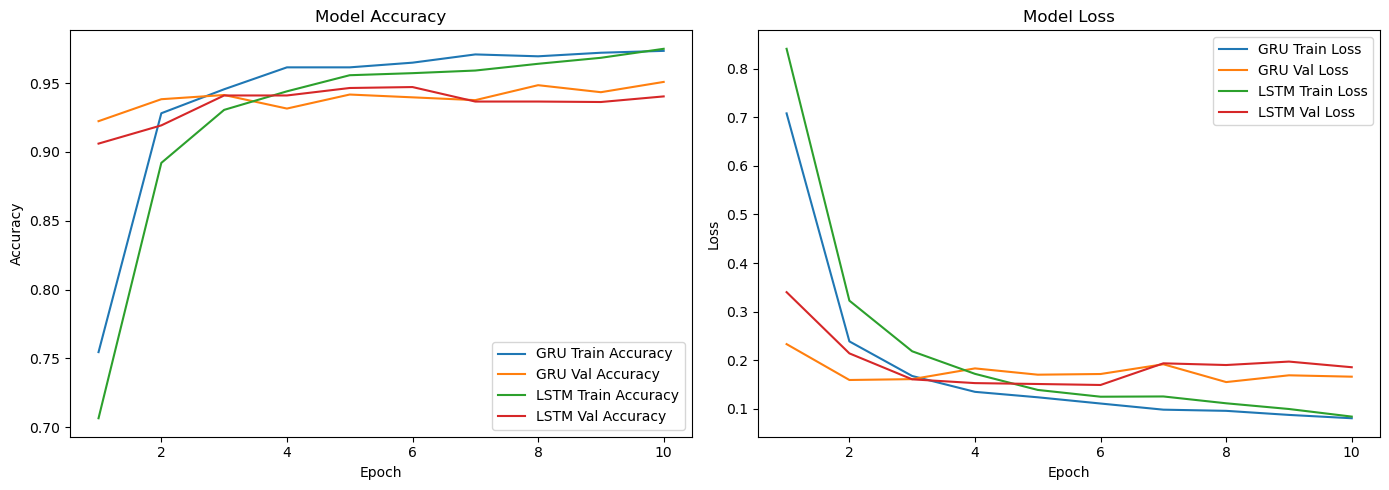

In [10]:
# Call the plotting function
plot_training_history(gru_history, lstm_history)


In [14]:
# Generate and display confusion matrices for both models
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6])
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


Confusion Matrix for GRU Model:
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


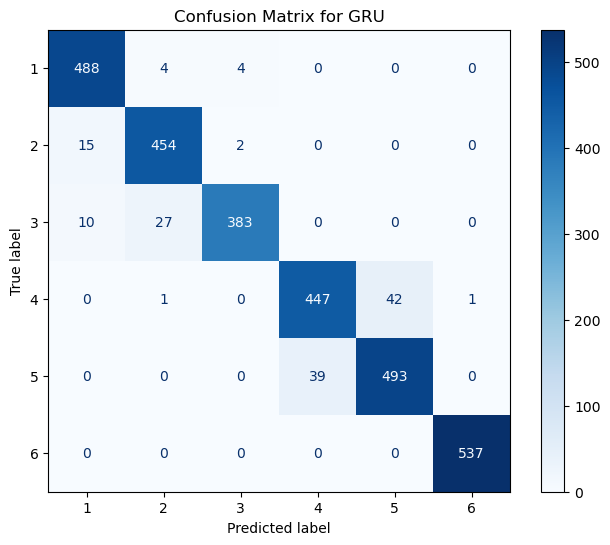

In [15]:
print("\nConfusion Matrix for GRU Model:")
plot_confusion_matrix(gru_model, X_test, y_test, "GRU")


Confusion Matrix for LSTM Model:
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


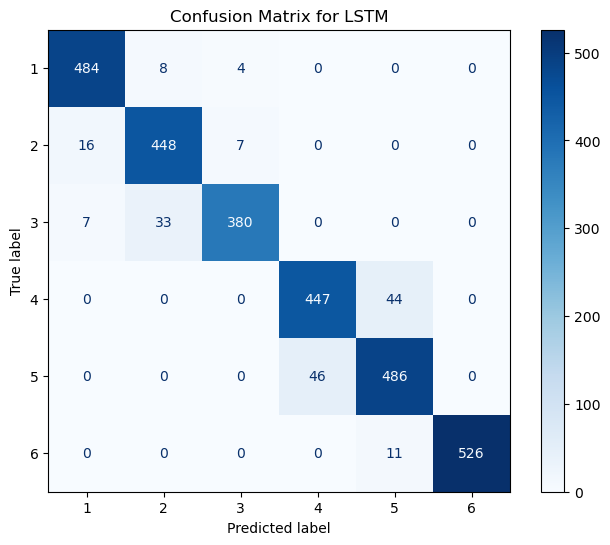

In [16]:
print("\nConfusion Matrix for LSTM Model:")
plot_confusion_matrix(lstm_model, X_test, y_test, "LSTM")